In [1]:
import os

import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.metrics import pairwise_distances
import phate
import scprep

os.chdir('../../src')
import mappings
import data_loader

In [2]:
def load_from_local(fpath):
    # Load into a DataFrame
    df = pd.read_csv(fpath)
    df.set_index('Unnamed: 0', inplace=True)
    return df    

inputs = load_from_local('../data/1000G/1000G_PCA')
labels = load_from_local('../data/1000G/1000G_labels')
admix_ratios = load_from_local('../data/1000G/1000G_admix_ratios')

In [3]:
fis_scores = pd.read_csv('../data/1000G/fis_scores.csv')
fis_scores = fis_scores.set_index('sample_id')
fis_scores = fis_scores.loc[labels.index.tolist()]

In [4]:
exp_path = '/lustre06/project/6065672/sciclun4/ActiveProjects/phate_genetics/data/1000G'
fname = '1000G.2504_WGS30x.GSA17k_MHI.intersectGSA.miss10perc.maf0.05.pruned.autosomes.noHLA.phased_imputed.hdf5'
inputs_raw, _, samples, snp_names, _ = data_loader.load_data_1000G(os.path.join(exp_path, fname))

In [5]:
# Estimate heterozygosity from raw inputs
heterozygosity = (inputs_raw == 1).sum(1)

In [6]:
# initial 2D phate embedding
phate_operator42_2d = phate.PHATE(random_state=42, 
                                  n_components=2, 
                                  knn=5, 
                                  n_pca=None,
                                  decay=60,
                                  t=5)
phate_operator42_2d.fit(inputs)
phate_emb42_2d = phate_operator42_2d.transform()

Running PHATE on 2504 observations and 100 variables.
Calculating graph and diffusion operator...
  Calculating KNN search...
  Calculated KNN search in 0.41 seconds.
  Calculating affinities...
  Calculated affinities in 0.09 seconds.
Calculated graph and diffusion operator in 0.56 seconds.
Calculating landmark operator...
  Calculating SVD...
  Calculated SVD in 0.23 seconds.
  Calculating KMeans...
  Calculated KMeans in 4.50 seconds.
Calculated landmark operator in 5.29 seconds.
Calculating diffusion potential...
Calculated diffusion potential in 0.71 seconds.
Calculating metric MDS...
Calculated metric MDS in 3.24 seconds.


/tmp/ipykernel_3781658/632720177.py:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


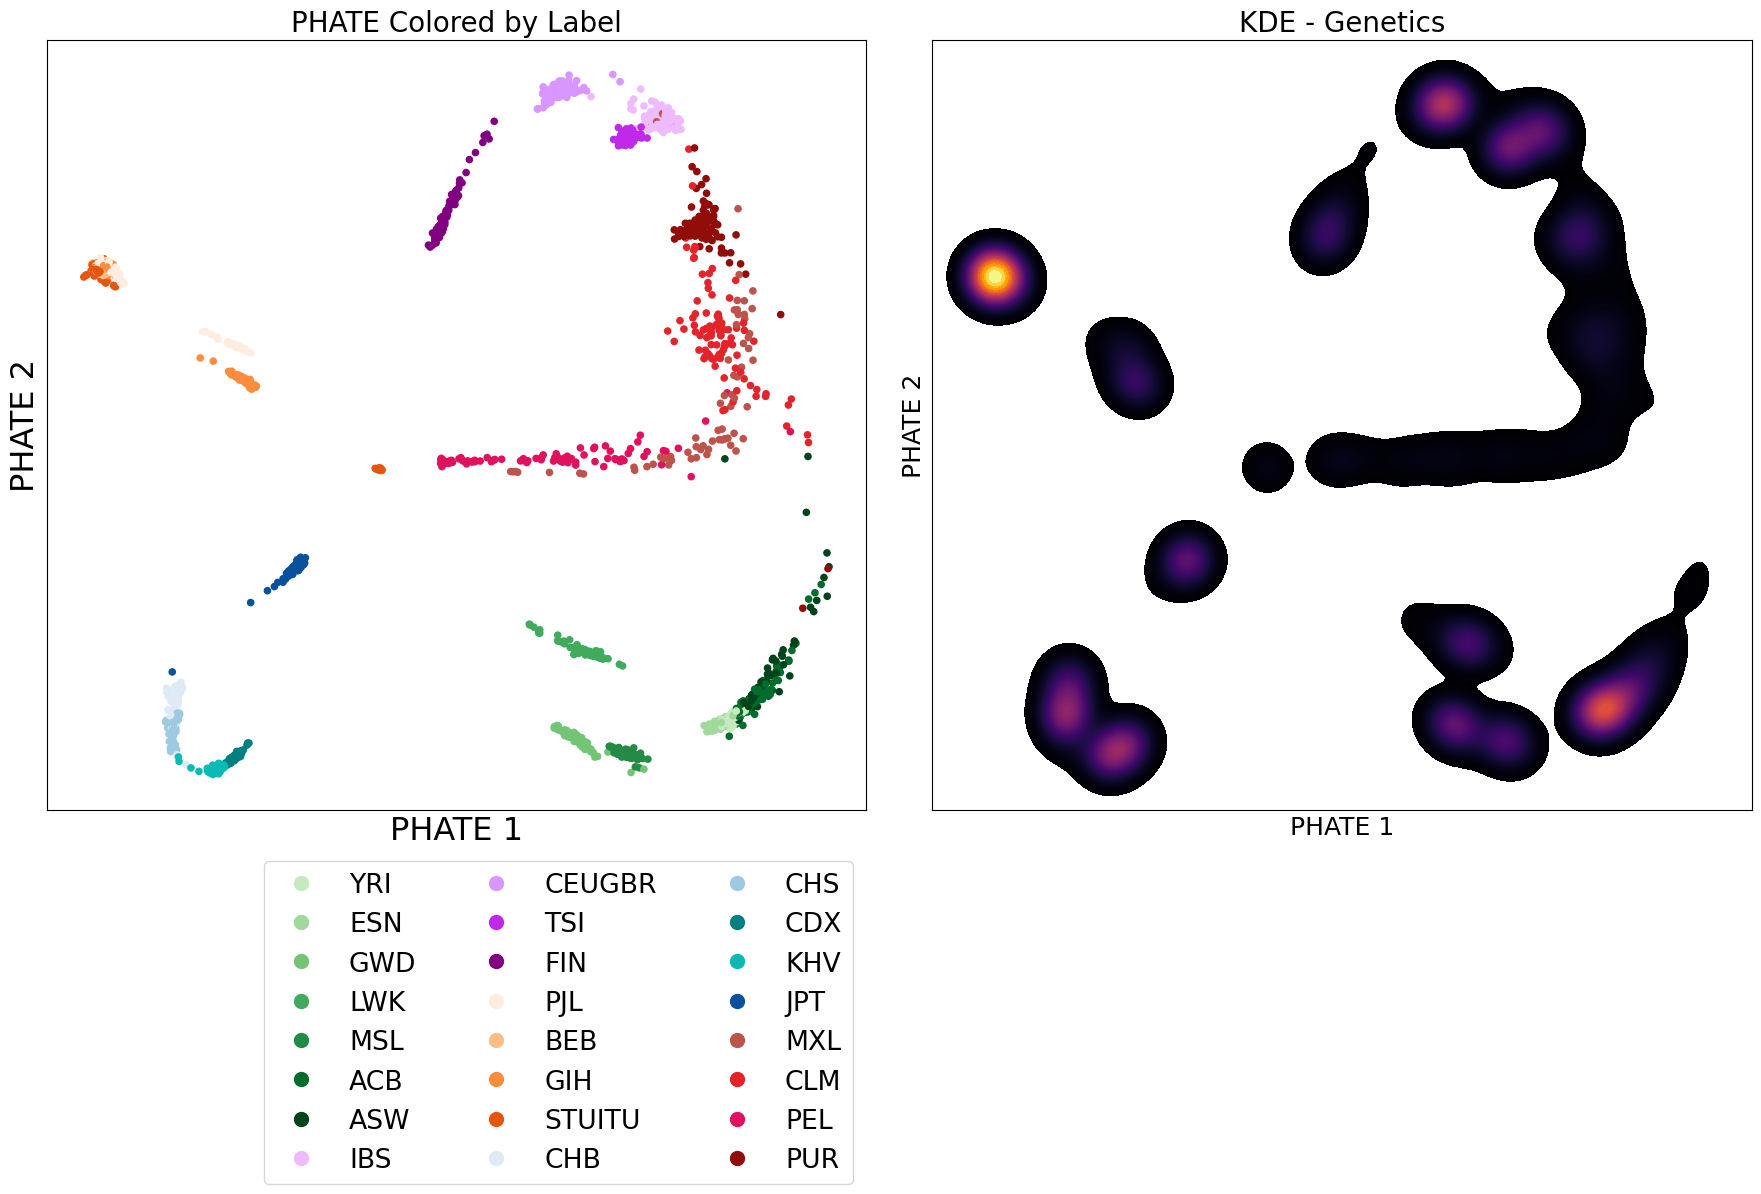

In [22]:
# PHATE
fig, ax = plt.subplots(ncols=2, figsize=(22, 10), gridspec_kw={'width_ratios': [1, 1], 'wspace': 0.08})

scprep.plot.scatter2d(phate_emb42_2d, s=20, ax=ax[0],
                      cmap=mappings.pop_pallette_1000G_fine, c=labels['population'],
                      xticks=False, yticks=False, legend_ncol=3, legend_anchor=(1, -0.05),
                      label_prefix="PHATE ",title='PHATE', fontsize=16)

sns.kdeplot(x=phate_emb42_2d[:,0], 
            y=phate_emb42_2d[:,1], 
            n_levels=100, 
            bw_adjust=0.25,
            fill=True, 
            cmap='inferno', 
            zorder=0, 
            ax=ax[1])

ax[1].set_xticks([])
ax[1].set_yticks([])

ax[1].set_xlabel('PHATE 1', fontsize=18)
ax[1].set_ylabel('PHATE 2', fontsize=18)

ax[0].set_title('PHATE Colored by Label', fontsize=20)
ax[1].set_title('KDE - Genetics', fontsize=20)

fig.tight_layout()

In [11]:
# Compare to KDE of t-SNE
from sklearn.manifold import TSNE

tsne_op = TSNE(n_components=2, perplexity=20, n_iter=1000, random_state=42)
tsne_embedding = tsne_op.fit_transform(inputs.values)

/tmp/ipykernel_3781658/3737415051.py:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


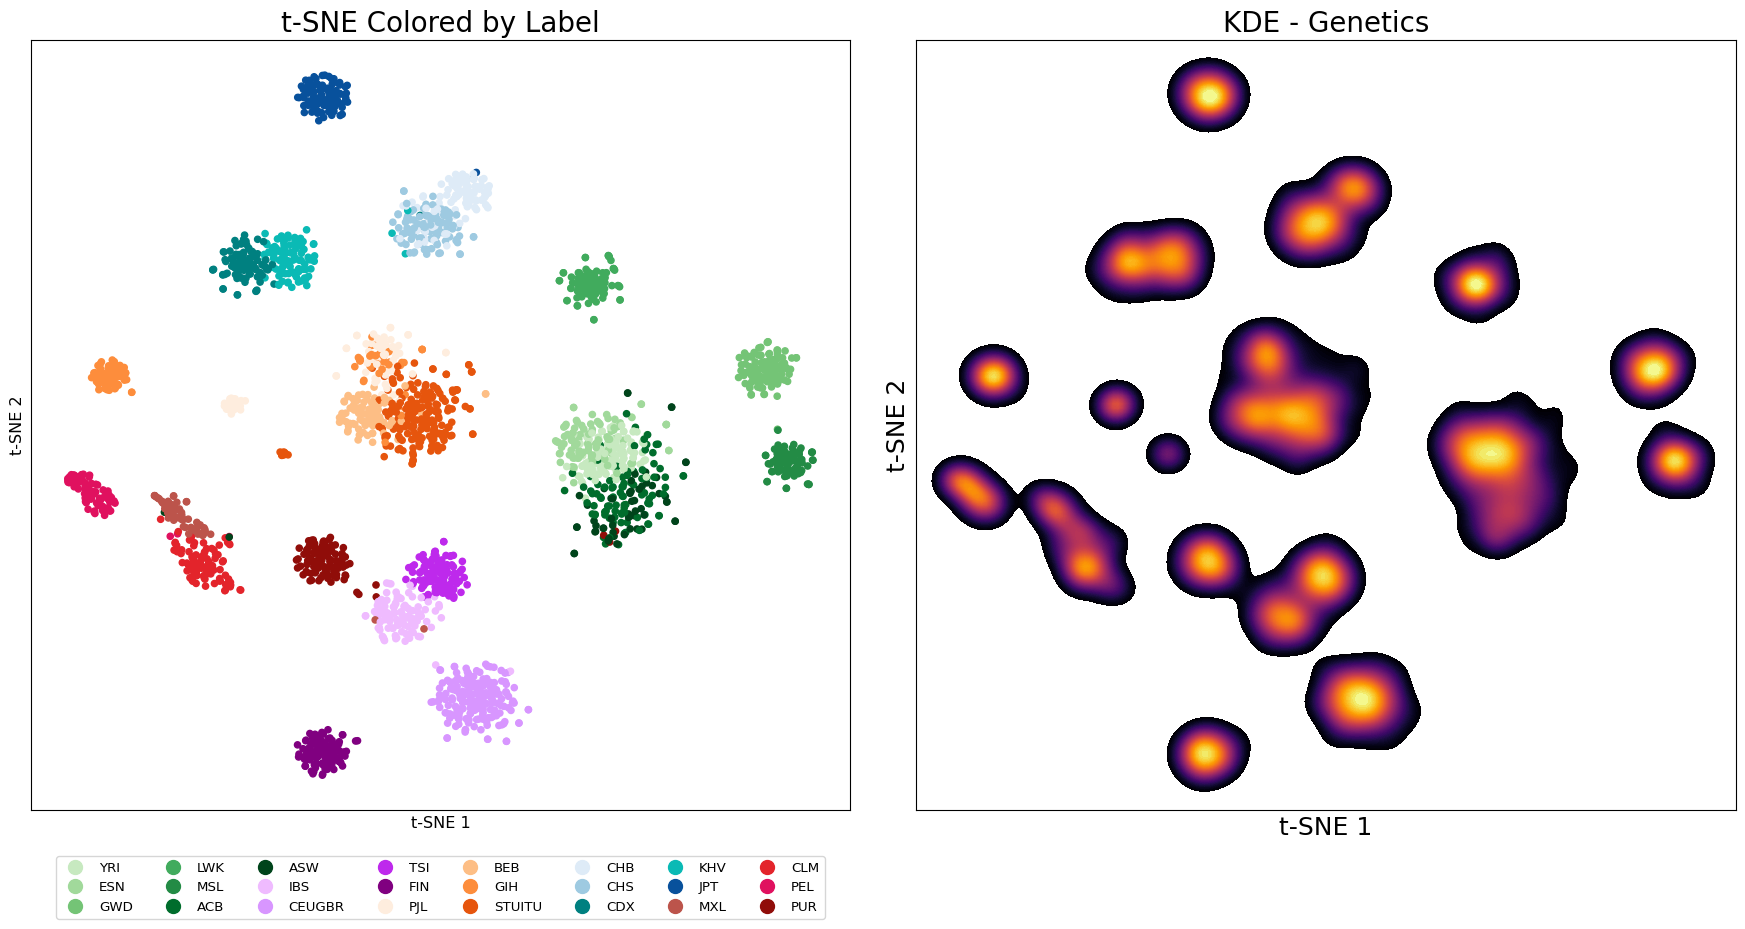

In [23]:
fig, ax = plt.subplots(ncols=2, figsize=(22, 10), gridspec_kw={'width_ratios': [1, 1], 'wspace': 0.08})

scprep.plot.scatter2d(tsne_embedding, 
                      s=20, 
                      cmap=mappings.pop_pallette_1000G_fine, ax=ax[0],
                      c=labels['population'], 
                      xticks=False, 
                      yticks=False,
                      legend=True, 
                      legend_loc='lower center', 
                      legend_anchor=(0.5, -0.15), 
                      legend_ncol=8,
                      label_prefix="t-SNE ", 
                      fontsize=8)

sns.kdeplot(x=tsne_embedding[:,0], 
            y=tsne_embedding[:,1], 
            n_levels=100, 
            bw_adjust=0.25,
            fill=True, 
            cmap='inferno', 
            zorder=0, 
            ax=ax[1])

ax[1].set_xticks([])
ax[1].set_yticks([])

ax[1].set_xlabel('t-SNE 1', fontsize=18)
ax[1].set_ylabel('t-SNE 2', fontsize=18)

ax[0].set_title('t-SNE Colored by Label', fontsize=20)
ax[1].set_title('KDE - Genetics', fontsize=20)

fig.tight_layout()

In [ ]:
# 3D PHATE
# initial phate embedding
phate_operator_3d = phate.PHATE(random_state=42, 
                                n_components=3, 
                                knn=5, 
                                decay=60,
                                n_pca=None)
phate_operator_3d.fit(pca_input)
phate_emb_3d = phate_operator_3d.transform()

scprep.plot.scatter3d(phate_emb_3d, 
                      c=label_with_names, 
                      figsize=(8,6),
                      cmap=mappings.pop_pallette_1000G_fine,
                      ticks=False, 
                      label_prefix="PHATE")